In [4]:
import tensorflow as tf
import csv
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
import pandas as pd

In [5]:
import tensorflow.compat.v1 as tf

11490434/11490434 [==============================] - 4s 0us/step


c:\Users\rene_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


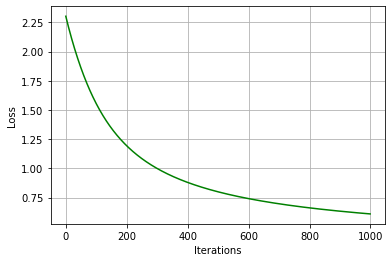

Test accuracy: 0.871
Confusion Matrix: [[ 946    0    3    3    0    4   15    1    8    0]
 [   0 1089    5    3    1    4    4    0   29    0]
 [  15   19  846   26   20    0   28   22   49    7]
 [   5    2   22  880    1   32    8   20   26   14]
 [   3    8    5    0  865    1   17    2   10   71]
 [  24   15    7   74   25  650   27   11   42   17]
 [  20    5   13    2   13   20  879    0    6    0]
 [   4   38   25    1   13    0    4  889   10   44]
 [  10   16   13   40   12   22   18   14  809   20]
 [  14   13   11   12   53   11    1   28   11  855]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Fetch and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten and normalize
X_train = X_train.reshape(X_train.shape[0], 28*28) / 255.0
X_test = X_test.reshape(X_test.shape[0], 28*28) / 255.0

# One-hot encode the labels for softmax regression
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Softmax function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

# Model training
def fit(X, y, n_iters, lr):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]
    weights = np.zeros((n_features, n_classes))
    biases = np.zeros((1, n_classes))
    losses = []

    for _ in range(n_iters):
        # Compute model predictions
        logits = np.dot(X, weights) + biases
        probs = softmax(logits)
        
        # Compute the loss
        loss = - np.mean(np.sum(y * np.log(probs + 1e-9), axis=1))
        losses.append(loss)
        
        # Gradient computation
        dz = probs - y
        dw = (1 / n_samples) * np.dot(X.T, dz)
        db = (1 / n_samples) * np.sum(dz, axis=0)
        
        # Update weights and biases
        weights -= lr * dw
        biases -= lr * db

    return weights, biases, losses

# Model prediction
def predict(X, weights, biases):
    logits = np.dot(X, weights) + biases
    probs = softmax(logits)
    return np.argmax(probs, axis=1)

learning_rate = 0.01
n_iters = 1000

weights, biases, losses = fit(X_train, y_train_encoded, n_iters, learning_rate)

# Plotting loss
plt.figure()
plt.plot(range(n_iters), losses, '-g')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Evaluate the model
predictions = predict(X_test, weights, biases)
cm = confusion_matrix(y_test, predictions)

print("Test accuracy: {0:.3f}".format(np.sum(np.diag(cm))/np.sum(cm)))
print("Confusion Matrix:", cm)


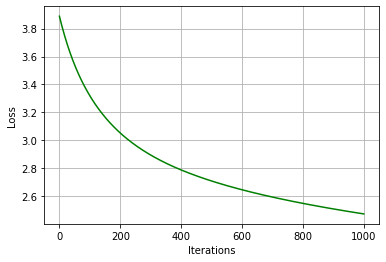

Test accuracy: 0.141
Confusion Matrix: [[243  40  18 143  32  49 292  43  63  57]
 [181 162 423   3  27   2 174  37  70  56]
 [ 92  35  76 156  58  13 276  97  40 189]
 [143  44  26 226  42  10 380  66  35  38]
 [ 57 189  28 174  42  44 148 140  36 124]
 [ 43  65  68 132  26  17 412  38  41  50]
 [123  58  36 244  10   8 270  72  20 117]
 [ 48 127  99  54  56  91 156 275  75  47]
 [ 40  79  57  98  16  23 471 102  24  64]
 [ 42 148  29 183  24  46 296 142  28  71]]


In [6]:
# Activation functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Model training with 1 hidden layer
def fit(X, y, n_iters, lr):
    n_samples, n_features = X.shape
    n_hidden_neurons = 10
    n_classes = y.shape[1]

    # Initialize weights and biases
    W1 = np.random.randn(n_features, n_hidden_neurons)
    b1 = np.zeros((1, n_hidden_neurons))
    W2 = np.random.randn(n_hidden_neurons, n_classes)
    b2 = np.zeros((1, n_classes))

    losses = []

    for _ in range(n_iters):
        # Feedforward
        Z1 = np.dot(X, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = softmax(Z2)

        # Compute the loss
        loss = - np.mean(np.sum(y * np.log(A2 + 1e-9), axis=1))
        losses.append(loss)

        # Backpropagation
        dZ2 = A2 - y
        dW2 = (1 / n_samples) * np.dot(A1.T, dZ2)
        db2 = (1 / n_samples) * np.sum(dZ2, axis=0)
        dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(Z1)
        dW1 = (1 / n_samples) * np.dot(X.T, dZ1)
        db1 = (1 / n_samples) * np.sum(dZ1, axis=0)

        # Update weights and biases
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    return W1, b1, W2, b2, losses

# Model prediction with 1 hidden layer
def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=1)

# ... [Your previous code for data preprocessing]

learning_rate = 0.01
n_iters = 1000

W1, b1, W2, b2, losses = fit(X_train, y_train_encoded, n_iters, learning_rate)

# Plotting loss
plt.figure()
plt.plot(range(n_iters), losses, '-g')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Evaluate the model
predictions = predict(X_test, W1, b1, W2, b2)
cm = confusion_matrix(y_test, predictions)

print("Test accuracy: {0:.3f}".format(np.sum(np.diag(cm))/np.sum(cm)))
print("Confusion Matrix:", cm)


In [ ]:
#==========================================#
#Start of Practical Sheet 2
#==========================================#

In [6]:
mnist_train = pd.read_csv("C:/temp/mnist/mnist_train.csv")
mnist_test = pd.read_csv("C:/temp/mnist/mnist_test.csv")

In [7]:
# columns that contain only zeros
empty_columns = mnist_train.columns[(mnist_train == 0).all()]

# Counting columns
num_empty_columns = len(empty_columns)
num_non_empty_columns = mnist_train.shape[1] - num_empty_columns

print(f"columns with zeros: {num_empty_columns}")
print(f"columns with values: {num_non_empty_columns}")


columns with zeros: 67
columns with values: 718


In [8]:
(X_train, y_train) = mnist_train.iloc[:,1:].values, mnist_train["label"].values
(X_test, y_test) = mnist_test.iloc[:,1:].values, mnist_test["label"].values

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


In [10]:
# Scale X_train
X_train_scaled = scaler_X.fit_transform(X_train)

# Use the same scaler for X_test
X_test_scaled = scaler_X.transform(X_test)


In [11]:
from sklearn.preprocessing import OneHotEncoder

# encoder instance
encoder = OneHotEncoder(sparse=False)

# y_train to one-hot encoded format
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))

# y_test using the same encoder
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))



c:\Users\rene_\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
# Activation functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)


In [106]:
#Fit with n_iters = 10000 and lr = 0.15
def fit(X, y, n_hidden=10, n_iters=1000, lr=0.15):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]

    # Initialize weights and biases
    W1 = np.random.randn(n_features, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_classes)
    b2 = np.zeros((1, n_classes))

    losses = []

# mudar o for  in por while loss nao trocar enquando for 10% alteraçao
    for _ in range(n_iters):
        # Feedforward
        Z1 = np.dot(X, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = softmax(Z2)

        # Compute the loss
        loss = -np.mean(np.sum(y * np.log(A2 + 1e-9), axis=1))
        losses.append(loss)

        # Backpropagation
        dZ2 = A2 - y
        dW2 = (1 / n_samples) * np.dot(A1.T, dZ2)
        db2 = (1 / n_samples) * np.sum(dZ2, axis=0)
        dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(Z1)
        dW1 = (1 / n_samples) * np.dot(X.T, dZ1)
        db1 = (1 / n_samples) * np.sum(dZ1, axis=0)

        # Update weights and biases
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

        print(f"Iteration: {_}")
        print(f"Loss: {loss}")
        
    return W1, b1, W2, b2, losses

In [107]:
def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=1)

In [108]:
#  train model with relative n_iters
W1, b1, W2, b2, losses = fit(X_train_scaled, y_train_encoded)

Iteration: 0
Loss: 3.101505263005804
Iteration: 1
Loss: 3.027566119013125
Iteration: 2
Loss: 2.966044241697464
Iteration: 3
Loss: 2.9138194269347846
Iteration: 4
Loss: 2.8687208804796898
Iteration: 5
Loss: 2.8292099287163324
Iteration: 6
Loss: 2.794173057437691
Iteration: 7
Loss: 2.762787119103166
Iteration: 8
Loss: 2.7344308342582617
Iteration: 9
Loss: 2.7086259264594905
Iteration: 10
Loss: 2.6849973556976994
Iteration: 11
Loss: 2.663246002941844
Iteration: 12
Loss: 2.643129585619741
Iteration: 13
Loss: 2.624449096381779
Iteration: 14
Loss: 2.607039005501641
Iteration: 15
Loss: 2.5907600674187266
Iteration: 16
Loss: 2.5754939565384696
Iteration: 17
Loss: 2.5611392071733183
Iteration: 18
Loss: 2.547608096898592
Iteration: 19
Loss: 2.5348242222238593
Iteration: 20
Loss: 2.522720589506314
Iteration: 21
Loss: 2.5112380946154604
Iteration: 22
Loss: 2.5003242998169024
Iteration: 23
Loss: 2.4899324407718444
Iteration: 24
Loss: 2.480020613808398
Iteration: 25
Loss: 2.470551105951382
Iteration

In [109]:
# Evaluate
predictions = predict(X_test, W1, b1, W2, b2)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Iteration:{iteration}")

Accuracy: 58.44%
Iteration:541


<ipython-input-12-1d4613750e1e>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


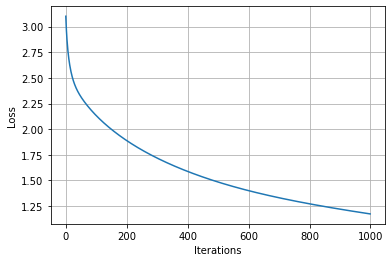

In [110]:
# Plot the loss
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [127]:
#============================================#
# Fit with relative n_iters
#============================================#

from collections import deque

def fit(X, y, n_hidden=10, lr=0.3):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]

    # Initialize weights and biases
    W1 = np.random.randn(n_features, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_classes)
    b2 = np.zeros((1, n_classes))

    losses = []
    prev_loss = float('inf')  # previous loss
    prev_loss = 1  # previous loss
    relative_changes = deque(maxlen=10)  # Store the last 10 relative changes

    iteration = 0  # Counter to track the number of iterations

    while True:
        # Feedforward
        Z1 = np.dot(X, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = softmax(Z2)

        # Compute the loss
        loss = -np.mean(np.sum(y * np.log(A2 + 1e-9), axis=1))
        losses.append(loss)

        # Calculate the relative change in loss if it's not the first iteration
        if prev_loss != float('inf'):
            relative_change = abs(prev_loss - loss) / prev_loss
            relative_changes.append(relative_change)
            print(f"Iteration: {iteration}")
            print(f"Loss: {loss}")
            print(f"Relative change: {100 * abs(prev_loss - loss) / prev_loss:.6f}%")
            
        # Stop if we've tracked 10 relative changes and the maximum change is less than 10%
        if 100 *(abs(prev_loss - loss) / prev_loss) < 0.02:
            return W1, b1, W2, b2, losses, iteration
            break

        # Backpropagation
        dZ2 = A2 - y
        dW2 = (1 / n_samples) * np.dot(A1.T, dZ2)
        db2 = (1 / n_samples) * np.sum(dZ2, axis=0)
        dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(Z1)
        dW1 = (1 / n_samples) * np.dot(X.T, dZ1)
        db1 = (1 / n_samples) * np.sum(dZ1, axis=0)

        # Update weights and biases
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

        # Update prev_loss for next iteration
        prev_loss = loss
        
        # Increase the iteration counter
        iteration += 1       
        

    return W1, b1, W2, b2, losses, iteration


In [128]:
def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=1)

In [129]:
#  train model with relative n_iters
W1, b1, W2, b2, losses,iteration = fit(X_train_scaled, y_train_encoded)

Iteration: 0
Loss: 4.339704705437051
Relative change: 333.970471%
Iteration: 1
Loss: 3.998110248897458
Relative change: 7.871376%
Iteration: 2
Loss: 3.713698030686802
Relative change: 7.113666%
Iteration: 3
Loss: 3.4843936500376205
Relative change: 6.174556%
Iteration: 4
Loss: 3.3045795752446048
Relative change: 5.160556%
Iteration: 5
Loss: 3.1656370834112963
Relative change: 4.204544%
Iteration: 6
Loss: 3.0584005862176347
Relative change: 3.387517%
Iteration: 7
Loss: 2.9749198621878445
Relative change: 2.729555%
Iteration: 8
Loss: 2.909025112642457
Relative change: 2.215009%
Iteration: 9
Loss: 2.8561708769718255
Relative change: 1.816905%
Iteration: 10
Loss: 2.8130589490964715
Relative change: 1.509431%
Iteration: 11
Loss: 2.7772871812099686
Relative change: 1.271632%
Iteration: 12
Loss: 2.7470876604644388
Relative change: 1.087375%
Iteration: 13
Loss: 2.72114540512671
Relative change: 0.944355%
Iteration: 14
Loss: 2.698474317852203
Relative change: 0.833145%
Iteration: 15
Loss: 2.678

In [126]:
# Evaluate
predictions = predict(X_test, W1, b1, W2, b2)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Iteration:{iteration}")

Accuracy: 10.03%
Iteration:1


<ipython-input-12-1d4613750e1e>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


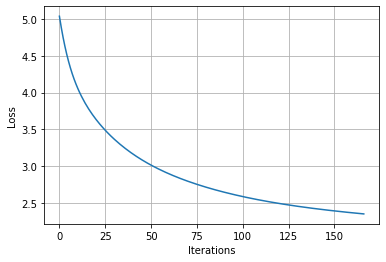

In [52]:
# Plot the loss
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [18]:
df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13]].values

array([[1.780e+00, 2.140e+00, 1.120e+01, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [2.360e+00, 2.670e+00, 1.860e+01, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.950e+00, 2.500e+00, 1.680e+01, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [4.280e+00, 2.260e+00, 2.000e+01, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [2.590e+00, 2.370e+00, 2.000e+01, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [4.100e+00, 2.740e+00, 2.450e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
#########################################################################
#   Read Data
#########################################################################


with open('wine.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader) # to skip the header file
    X = []
    y = []
    for row in csv_reader:
        X.append([float(row[0]), 1])
        y.append(float(row[1]))

X = np.asarray()
y = np.asarray(y)

In [27]:
X = np.asarray(df.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13]].values)
y = np.asarray(df.iloc[:, 1].values)

In [28]:

#########################################################################
#   Closed-form method
#########################################################################

theta_direct = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)

print('Solution (closed-form): J={:.1f}, Theta=({:.2f}, {:.2f})'.format(J(X,y, theta_direct), theta_direct[0], theta_direct[1]))

NameError: name 'J' is not defined

In [29]:
#########################################################################
#   Gradient Descent method
#########################################################################

learning_rate = 0.0000001
tot_iterations = 100

theta_gd = [uniform(0., 0.5), uniform(750., 1000.)]

for i in range(tot_iterations):
    t_0 = 0
    t_1 = 0
    for j in range(len(y)):
        t_0 +=  (theta_gd[0] * X[j][0] + theta_gd[1] - y[j]) * X[j][0]
        t_1 +=  theta_gd[0] * X[j][0] + theta_gd[1] - y[j]

    t_0 /= len(y)
    t_1 /= len(y)

    theta_gd[0] = theta_gd[0] - learning_rate * t_0
    theta_gd[1] = theta_gd[1] - learning_rate * t_1

print('Solution (Gradient descent): J={:.1f}, Theta=({:.2f}, {:.2f})'.format(J(X,y, theta_gd), theta_gd[0], theta_gd[1]))

NameError: name 'J' is not defined

In [30]:
tf.compat.v1.disable_eager_execution()

In [62]:
#########################################################################
#   Tensor flow
#########################################################################

sess = tf.Session()

# Graph Definition

x_data = tf.placeholder(shape=[None, len(X[0])], dtype=tf.float64)
y_target = tf.placeholder(shape=[None], dtype=tf.float64)

theta_gd_initial = np.random.uniform(-0.5, 0.5, size=(len(X[0]),))
#weights = tf.Variable(tf.random.uniform(shape=[1, len(X[0])], minval=750., maxval=1000))
weights = tf.Variable(tf.convert_to_tensor(theta_gd_initial))
#criar um vetor para os 12 pesos


In [63]:
# Define the Model
with tf.variable_scope('model_definition') as scope:
    model_output = 1.0/(1.0 + tf.exp(- tf.matmul(x_data, tf.expand_dims(weights,1))))
    scope.reuse_variables()


In [64]:
def loss_l2(predict, gt):
    predict = tf.squeeze(predict)
    #predict = tf.Print(predict,["predict: ", tf.shape(predict)])
    resid = predict - gt
    ret = tf.sqrt(tf.reduce_sum(tf.pow(resid, tf.constant(2.))))
    return ret


In [65]:
loss = loss_l2(model_output, y_target)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)


TypeError: Input 'y' of 'Pow' Op has type float32 that does not match type float64 of argument 'x'.

In [12]:
# Graph execution

init = tf.global_variables_initializer()
sess.run(init)


for i in range(tot_iterations):
    sess.run(train_step, feed_dict={x_data: X, y_target: y})

theta_tf = sess.run(weights)
cur_loss = J(X,y, theta_tf)

print('Solution (Tensor flow): J={:.1f}, Theta=({:.2f}, {:.2f})'.format(cur_loss, theta_tf[0][0], theta_tf[1][0]))


Solution (Tensor flow): J=649.3, Theta=(0.34, 893.37)


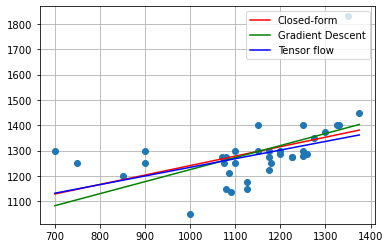

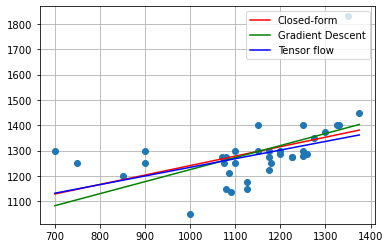

In [ ]:
#########################################################################
#   TResults Visualization
#########################################################################
plt.ion()
plt.figure(2)
plt.plot(X[:,0], y, 'o')
plt.plot([np.min(X[:,0]), np.max(X[:,0])],[theta_direct[0]*np.min(X[:,0])+theta_direct[1], theta_direct[0]*np.max(X[:,0])+theta_direct[1] ] ,'-r', label='Closed-form')
plt.plot([np.min(X[:,0]), np.max(X[:,0])],[theta_gd[0]*np.min(X[:,0])+theta_gd[1], theta_gd[0]*np.max(X[:,0])+theta_gd[1] ] ,'-g', label='Gradient Descent')
plt.plot([np.min(X[:,0]), np.max(X[:,0])],[theta_tf[0]*np.min(X[:,0])+theta_tf[1], theta_tf[0]*np.max(X[:,0])+theta_tf[1] ] ,'-b', label='Tensor flow')
plt.legend(loc='upper right')
plt.grid()
plt.show()
plt.pause(0.1)

In [ ]:
input('Close app?')

''